# __``Correlation Test``__

<hr>

Korelasi adalah tentang asosiasi dan tidak berimplikasi pada sebab akibat. Korelasi tidak membedakan variabel respons (x) dan variabel penjelas (y). Korelasi hanya mengukur seberapa kuat hubungan dan arah hubungan.
Korelasi berkisar pada -1 <r <1, serta arah positif (+) dan arah negatif (-). Arah positif artinya bila satu variabel naik, variabel lain juga naik. Sedangkan negatif memiliki hubungan yang berkebalikan seperti hubungan populasi tikus di sawah dengan produksi padi.

Hasil korelasi dapat dinilai dari standar:
* Nilai 0   - 0,3 berarti lemah
* Nilai 0,3 - 0,7 berarti hubungannya sedang
* Nilai 0,7 - 1   berarti kekuatan hubungannya kuat

**Korelasi Pearson**

Korelasi Pearson memiliki beberapa asumsi. Pertama, kedua variabel harus berupa kuantitatif. Kedua, hubungan kedua variabel harus linier (terlihat garis lurus dalam Scatterplot). Terakhir, memenuhi asumsi statistik parametrik seperti distribusi normal, sampel diambil secara acak, dan jumlah data yang mencukupi. 

**Korelasi Spearman**

Korelasi Spearman juga memiliki beberapa asumsi. Pertama, selain variabel kuantitatif, uji korelasi spearman juga dapat digunakan untuk eksplorasi variabel dengan skala ordinal. Kedua, hubungan antara dua variabel tidak liniear (tidak terlihat garis lurus dalam Scatterplot). Terakhir, sebenarnya korelasi spearman adalah versi statistik non-parametrik dari korelasi Pearson. Singkat kata, jika variabel kuantitatif dan linear, tetapi jika tidak memenuhi syarat parametrik, maka dapat menggunakan korelasi Spearman.

<hr>

### **1. Import Libraries**

Pada sesi ini, kita menggunakan library Pandas untuk membuka dataset dan uji korelasi. Dengan Pandas, kita bisa melakukan uji korelasi baik Spearman maupun Pearson. Sedangkan Seaborn dan Matplotlib digunakan untuk membantu visualisasi data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### **2. Intro to Dataset: ``Amazon Best Selling Books``**

Dataset ``Amazon Best Selling Books`` adalah data publik dan legal. Anda dapat membaca deskripsi dan mengunduhnya di website [Kaggle](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019). Dataset ini berisi tentang 50 buku penjualan terbaik di Amazon dari tahun 2009 sampai tahun 2019. Data telah dikategorikan ke dalam buku fiksi dan non-fiksi menggunakan Goodreads.


Mari kita buka dataset menggunakan pandas (_pd.read_csv_), lalu simpan dataset ke dalam variabel dengan nama df. Data dapat kita lihat sekilas (5 baris awal) terlebih dahulu dengan _df.head()_

In [2]:
df = pd.read_csv('bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


**Data Info**

Gambaran awal mengenai dataset dapat kita lihat menggunakan (_df.info()_). Melalui cara ini kita dapat melihat kolom apa saja di dataset, jumlah baris data yang terisi (tidak kosong), dan tipe datanya.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


<hr>

### **3. Correlation Test**



### **a) Correlation Test Summary**

Kita dapat melakukan uji korelasi pada beberapa variabel secara bersamaan. Pada contoh di bawah ini, kita ingin menguji korelasi pada variabel/kolom _User Rating, Reviews_ dan _Price_. Jika pada code (_.corr()_) kita biarkan kosong seperti di bawah ini, maka secara _default_, Pandas akan menggunakan Korelasi Pearson.

Ringkasan uji korelasi di bawah ini dapat digunakan untuk melihat sekilas bagaimana pola hubungan antar variabel. Tapi, jika hendak menguji korelasi antar variabel, lebih baik kita cek dulu apakah hubungan keduanya linear atau tidak.

**Correlation Matrix**

In [4]:
df[['User Rating', 'Reviews', 'Price']].corr()

,User Rating,Reviews,Price
User Rating,1.000000,-0.001729,-0.133086
Reviews,-0.001729,1.000000,-0.109182
Price,-0.133086,-0.109182,1.000000


<hr>

### **b) User Rating & Reviews Correlation**

Kita hendak menguji korelasi antara variabel _**User Rating**_ dengan _**Reviews**_. Sebelum itu, kita cek pola hubungan keduanya, apakah linear ataukah tidak. Dari hasil visualisasi di bawah ini, kita dapat lihat pola hubungan keduanya tidak membentuk garis lurus (liniear). Meskipun jenis datanya kuantitatif tetapi hubungan keduanya tidak linear. Maka kita pilih menggunakan Korelasi Spearman.

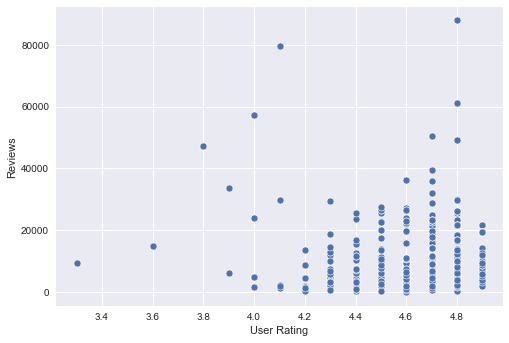

In [5]:
sns.scatterplot(x = df['User Rating'], y = df['Reviews'])
plt.show()

Uji korelasi Spearman antara variabel _**User Rating** dengan **Reviews**_ . Pada hasil code di bawah ini, kita lihat nilai korelasinya 0,2 positif. Artinya, hubungan keduanya positif tetapi kekuatannya lemah.

In [6]:
df[['User Rating', 'Reviews']].corr(method = 'spearman')

,User Rating,Reviews
User Rating,1.000000,0.200458
Reviews,0.200458,1.000000


Bentuk code lain untuk melakukan uji korelasi Spearman.

In [7]:
df['User Rating'].corr(df['Reviews'], method='spearman')

0.20045803777248958

Seandainya hubungan kedua variabel linear, kita bisa menggunakan Pearson seperti di bawah ini:

In [8]:
df[['User Rating', 'Reviews']].corr(method = 'pearson')

,User Rating,Reviews
User Rating,1.000000,-0.001729
Reviews,-0.001729,1.000000


<hr>

### **c) User Rating & Price Correlation**

Kita hendak menguji korelasi antara variabel _**User Rating**_ dengan _**Price**_. Sebelum itu, kita cek pola hubungan keduanya, apakah linear ataukah tidak. Dari hasil visualisasi di bawah ini, kita dapat lihat pola hubungan keduanya tidak membentuk garis lurus (liniear). Meskipun jenis datanya kuantitatif tetapi hubungan keduanya tidak linear. Maka kita pilih menggunakan Korelasi Spearman.

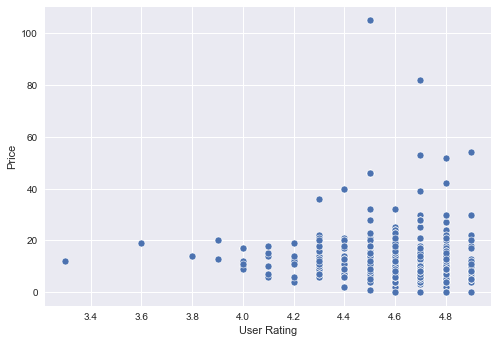

In [9]:
sns.scatterplot(x = df['User Rating'], y=df['Price'])
plt.show()

Uji korelasi Spearman antara variabel _**User Rating**_ dengan _**Price**_. Pada hasil code di bawah ini, kita lihat nilai korelasinya 0,2 negatif. Artinya, sifat hubungan keduanya berkebalikan. Kekuatan hubungan keduanya juga lemah.

In [10]:
df[['User Rating', 'Price']].corr(method = 'spearman')

,User Rating,Price
User Rating,1.00000,-0.23107
Price,-0.23107,1.00000


Bentuk code lain untuk melakukan uji korelasi Spearman.

In [11]:
df['User Rating'].corr(df['Price'], method = 'spearman')

-0.23106979558156984

<hr>

### **c) User Reviews & Price Correlation**

Kita hendak menguji korelasi antara variabel _**Reviews**_ dengan _**Price**_. Sebelum itu, kita cek pola hubungan keduanya, apakah linear ataukah tidak. Dari hasil visualisasi di bawah ini, kita dapat lihat pola hubungan keduanya tidak membentuk garis lurus (liniear). Meskipun jenis datanya kuantitatif tetapi hubungan keduanya tidak linear. Maka kita pilih menggunakan Korelasi Spearman.

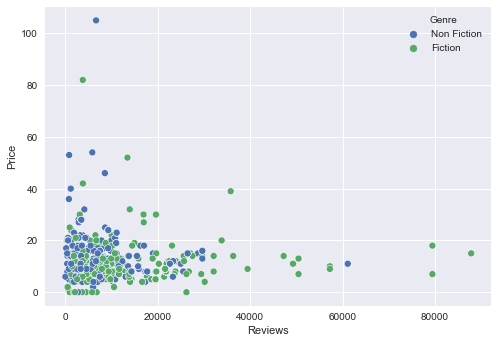

In [15]:
sns.scatterplot(x=df['Reviews'], y=df['Price'], hue=df['Genre'])
plt.show()

Uji korelasi Spearman antara variabel _**Reviews**_ dengan _**Price**_. Pada hasil code di bawah ini, kita lihat nilai korelasinya 0,15 negatif. Artinya, sifat hubungan keduanya berkebalikan. Kekuatan hubungan keduanya juga lemah.

In [13]:
df[['Reviews', 'Price']].corr(method='spearman')

,Reviews,Price
Reviews,1.000000,-0.150263
Price,-0.150263,1.000000


Bentuk code lain untuk melakukan uji korelasi Spearman.

In [14]:
df['Reviews'].corr(df['Price'], method='spearman')

-0.15026314273004007

<hr>